In [2]:
pwd

'C:\\Users\\pande\\ML Projects'

In [3]:
cd E:\ml_projects

E:\ml_projects


In [4]:
import os
import io
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [5]:
data = DataFrame({'Email': [], 'Category': []})

In [6]:
data

,Email,Category


In [7]:
def readFiles(path):
    
    for root, dirnames, filenames in os.walk(path):   #os.walk() generates filenames in all directories within given path 
                                                      #root is the path we provide to the function
                                                      #dirnames is empty list since there are no directories within the path
                                                      #filenames is the names of files within the directories
     
        for filename in filenames:
            
            path = os.path.join(root, filename)
            
            content = []
            
            inBody=False
            
            f = io.open(path, 'r',encoding='latin1')
            
            for line in f:
                
                if inBody:
                    content.append(line)
                    
                elif line=='\n':                  #the email content start after the first empty line
                    inBody=True
            
            f.close()
            
            msg='\n'.join(content)    #content changes from list to string
            
            yield msg
            


In [8]:
def readDataFromDataframe(path,category):
    rows=[]
    for content in readFiles(path):
        rows.append({'Email':content,'Category':category})
    return DataFrame(rows)

In [9]:
data=data.append(readDataFromDataframe('E:\ml_projects\spam_classifier\spam','Spam'),sort=True)

In [10]:
data.head()

,Category,Email
0,Spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
1,Spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2,Spam,##############################################...
3,Spam,I thought you might like these:\n\n1) Slim Dow...
4,Spam,A POWERHOUSE GIFTING PROGRAM You Don't Want To...


In [11]:
data=data.append(readDataFromDataframe('E:\ml_projects\spam_classifier\ham','Ham'),sort=True)

In [12]:
data.head()

,Category,Email
0,Spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
1,Spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2,Spam,##############################################...
3,Spam,I thought you might like these:\n\n1) Slim Dow...
4,Spam,A POWERHOUSE GIFTING PROGRAM You Don't Want To...


In [13]:
vec = CountVectorizer()
counts = vec.fit_transform(data['Email'].values)   #tokenises mail and counts the frequency of words in each email

classifier = MultinomialNB()
targets = data['Category'].values
classifier.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [14]:
test_data=['hurry up sale.. limited offer','important meeting tomorrow']

In [15]:
test_count=vec.transform(test_data)

In [16]:
pre=classifier.predict(test_count)
pre

array(['Spam', 'Ham'], dtype='<U4')

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Email'], data['Category'], test_size = 0.25,random_state=0)
examp = vec.transform(X_test)
y_pred = classifier.predict(examp)
y_pred

array(['Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham',
       'Ham', 'Ham', 'Ham', 'Spam', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham',
       'Spam', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Spam', 'Ham',
       'Spam', 'Ham', 'Spam', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham',
       'Spam', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Spam', 'Ham',
       'Spam', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham',
       'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham',
       'Ham', 'Ham', 'Ham', 'Ham', 'Spam', 'Ham', 'Ham', 'Ham', 'Ham',
       'Ham', 'Ham', 'Ham', 'Ham', 'Spam', 'Ham', 'Ham', 'Ham', 'Ham',
       'Spam', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham',
       'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Spam', 'Ham', 'Ham', 'Ham',
       'Spam', 'Ham', 'Ham', 'Ham', 'Ham', 'Spam', 'Ham', 'Ham', 'Ham',
       'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham', 'Ham',
       'Ham', 'Ham', 'Ham', 'Ham', 'Spam', 'Ham', 'Ham', 'Ham', 'Ham',
     

In [18]:
from sklearn.metrics import confusion_matrix                    # total emails= 3000
cm = confusion_matrix(y_test,y_pred)
cm

array([[626,   0],
       [ 19, 105]], dtype=int64)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])
data

,Category,Email
0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
1,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2,1,##############################################...
3,1,I thought you might like these:\n\n1) Slim Dow...
4,1,A POWERHOUSE GIFTING PROGRAM You Don't Want To...
5,1,Help wanted. We are a 14 year old fortune 500...
6,1,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...
7,1,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...
8,1,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce..."
9,1,Cellular Phone Accessories All At Below Wholes...


In [25]:
vec = CountVectorizer()
counts = vec.fit_transform(data['Email'].values)   #tokenises mail and counts the frequency of words in each email

classifier = MultinomialNB()
targets = data['Category'].values
classifier.fit(counts, targets)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Email'], data['Category'], test_size = 1/100,random_state=0)
coun=vec.transform(X_test)
y_pred=classifier.predict(coun)
y_test.shape

(30,)

In [26]:
x=np.zeros(30)
x[:]+=np.arange(30)

In [27]:
x_trans=x.transpose()

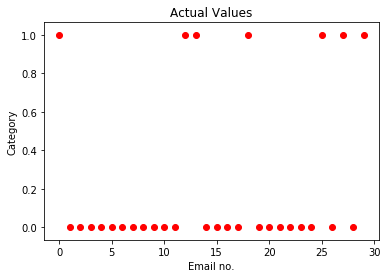

In [28]:
plt.scatter(x_trans,y_test,color='red')  
plt.axes()
plt.xlabel('Email no.')
plt.ylabel('Category')
plt.title('Actual Values')
plt.show()

Text(0.5, 1.0, 'Predicted Values')

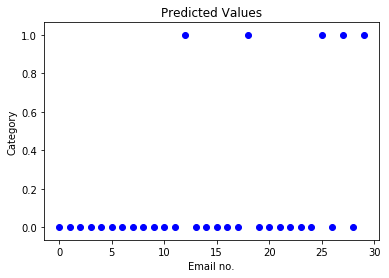

In [29]:
plt.scatter(x_trans,y_pred,color='blue')
plt.xlabel('Email no.')
plt.ylabel('Category')
plt.title('Predicted Values')